In [1]:
import nilmtk
import pandas as pd

In [2]:
from nilmtk import DataSet

In [3]:
iawe = DataSet('iawe.h5')

In [4]:
elec = iawe.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=6, building=1, dataset='iAWE', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='iAWE', appliances=[Appliance(type='clothes iron', instance=1)])
  ElecMeter(instance=9, building=1, dataset='iAWE', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[A

In [5]:
fridge = elec['fridge']
fridge.available_columns()

[('power', 'reactive'),
 ('power', 'apparent'),
 ('current', None),
 ('power factor', None),
 ('frequency', None),
 ('voltage', None),
 ('power', 'active')]

In [7]:
df = next(fridge.load())
df.head()

physical_quantity            power          current  frequency     voltage  \
type                      reactive apparent                                  
2013-06-07 05:30:00+05:30    2.483    2.486   0.011  50.070000  235.070007   
2013-06-07 05:30:01+05:30    2.547    2.555   0.011  50.080002  235.020004   
2013-06-07 05:30:02+05:30    2.480    2.485   0.011  50.080002  234.979996   
2013-06-07 05:30:03+05:30    2.444    2.449   0.010  50.060001  235.000000   
2013-06-07 05:30:04+05:30    2.510    2.519   0.011  50.060001  234.949997   

physical_quantity          power  
type                      active  
2013-06-07 05:30:00+05:30  0.111  
2013-06-07 05:30:01+05:30  0.200  
2013-06-07 05:30:02+05:30  0.152  
2013-06-07 05:30:03+05:30  0.159  
2013-06-07 05:30:04+05:30  0.215

In [8]:
mi = df.columns

In [138]:
mi

MultiIndex([(    'power', 'reactive'),
            (    'power', 'apparent'),
            (  'current',         ''),
            ('frequency',         ''),
            (  'voltage',         ''),
            (    'power',   'active')],
           names=['physical_quantity', 'type'])

In [258]:
tb = pd.DataFrame(columns = df.columns)

In [585]:
new_df = pd.read_csv('ac_seconds2.csv',names =['timestamp','R','A','C','F','V','T'])

In [586]:
new_df.head()

,timestamp,R,A,C,F,V,T
0,2020-08-12 23:50:00+05:30,3000.00,3000.0,9.94,49.98,230.07,-3.0
1,2020-08-12 23:50:01+05:30,2500.00,2500.0,9.93,49.98,230.15,-5.0
2,2020-08-12 23:50:02+05:30,2799.97,2800.0,9.92,49.98,230.15,-14.0
3,2020-08-12 23:50:03+05:30,2599.97,2600.0,9.89,49.98,230.15,-13.0
4,2020-08-12 23:50:04+05:30,2374.92,2375.0,9.88,49.98,230.14,-19.0


In [250]:
tb[df.columns]= new_df[new_df.columns]
tb.head()

physical_quantity            power          current frequency voltage  power
type                      reactive apparent                           active
2020-08-12 23:50:00+05:30  3000.00   3000.0    9.94     49.98  230.07   -3.0
2020-08-12 23:50:01+05:30  2500.00   2500.0    9.93     49.98  230.15   -5.0
2020-08-12 23:50:02+05:30  2799.97   2800.0    9.92     49.98  230.15  -14.0
2020-08-12 23:50:03+05:30  2599.97   2600.0    9.89     49.98  230.15  -13.0
2020-08-12 23:50:04+05:30  2374.92   2375.0    9.88     49.98  230.14  -19.0

tb.to_hdf('CAXE.h5', key='CAXE', mode='w')

In [251]:
tb

physical_quantity            power          current frequency voltage  power
type                      reactive apparent                           active
2020-08-12 23:50:00+05:30  3000.00  3000.00    9.94     49.98  230.07   -3.0
2020-08-12 23:50:01+05:30  2500.00  2500.00    9.93     49.98  230.15   -5.0
2020-08-12 23:50:02+05:30  2799.97  2800.00    9.92     49.98  230.15  -14.0
2020-08-12 23:50:03+05:30  2599.97  2600.00    9.89     49.98  230.15  -13.0
2020-08-12 23:50:04+05:30  2374.92  2375.00    9.88     49.98  230.14  -19.0
...                            ...      ...     ...       ...     ...    ...
2020-08-13 01:44:22+05:30  2352.87  2366.97   10.11     49.98  232.25 -258.0
2020-08-13 01:44:23+05:30  2358.33  2372.73   10.14     49.98  231.88 -261.0
2020-08-13 01:44:24+05:30  2349.29  2363.64   10.13     49.98  231.58 -260.0
2020-08-13 01:44:25+05:30  2351.18  2366.07   10.15     49.98  232.43 -265.0
2020-08-13 01:44:26+05:30  2354.73  2369.37   10.15     49.98  232.19 -263.0

[6867 rows x 6 columns]

In [25]:
import numpy as np
from os.path import join
from nilmtk.datastore import Key
from nilmtk.measurement import LEVEL_NAMES
from nilmtk.utils import check_directory_exists, get_datastore, get_module_directory
from nilm_metadata import convert_yaml_to_hdf5
from copy import deepcopy

In [662]:
def reindex_fill_na(df, idx):
    df_copy = deepcopy(df)
    df_copy = df_copy.reindex(idx)

    power_columns = [
        x for x in df.columns if x[0] in ['power']]
    non_power_columns = [x for x in df.columns if x not in power_columns]

    for power in power_columns:
        df_copy[power].fillna(0, inplace=True)
    for measurement in non_power_columns:
        df_copy[measurement].fillna(df[measurement].median(), inplace=True)

    return df_copy
column_mapping = {
    'F': ('frequency', ""),
    'V': ('voltage', ""),
    'T': ('power', 'active'),
    'C': ('current', ''),
    'R': ('power', 'reactive'),
    'A': ('power', 'apparent'),
}

TIMESTAMP_COLUMN_NAME = "timestamp"
TIMEZONE = "Asia/Kolkata"
START_DATETIME, END_DATETIME = '2013-07-13', '2013-08-04'
FREQ = "1T"

output_filename = 'caxe97.h5'

# Open data store
store = get_datastore(output_filename, format='HDF', mode='w')
idx = pd.date_range(start=START_DATETIME, end=END_DATETIME, freq=FREQ)
idx = idx.tz_localize('GMT').tz_convert(TIMEZONE)

key = Key(building=1, meter=1)
print('Loading ', 1)
df =new_df[:]
df.index = pd.to_datetime(df.timestamp.values)
df = df.tz_convert(TIMEZONE)
df = df.drop(TIMESTAMP_COLUMN_NAME, 1)
df.index = pd.to_datetime(df.index.values)
df.columns = pd.MultiIndex.from_tuples(
            [column_mapping[x] for x in df.columns],
            names=LEVEL_NAMES
        )
# print(df)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.dropna()
df = df.astype(np.float32)
df = df.sort_index()
df = df.resample("1T").mean()
# df = reindex_fill_na(df, idx)
df = df.set_index(idx[:115])
# print(df)

assert df.isnull().sum().sum() == 0
# Open data store

store.put(str(key), df)

################################################################################
store.close()

convert_yaml_to_hdf5('./metadata', output_filename)

print("Done converting iAWE to HDF5!")

Loading  1
Done converting YAML metadata to HDF5!
Done converting iAWE to HDF5!


In [663]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

caxe = DataSet('./caxe97.h5')

In [664]:
caxe

# Disaggregation

In [665]:
from __future__ import print_function, division

import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

%matplotlib inline

In [666]:
rcParams['figure.figsize'] = (13, 6)

In [667]:
train = DataSet('./iawe.h5')
test = caxe

In [668]:
train.set_window()
test.set_window()

In [669]:
train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

<AxesSubplot:ylabel='Power (W)'>

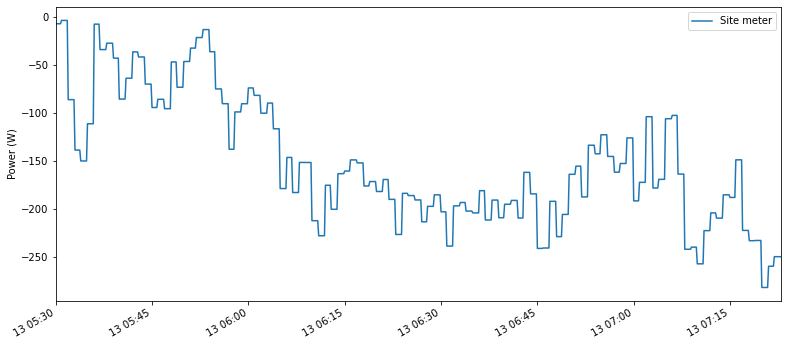

In [670]:
test_elec.plot()

<AxesSubplot:ylabel='Power (W)'>

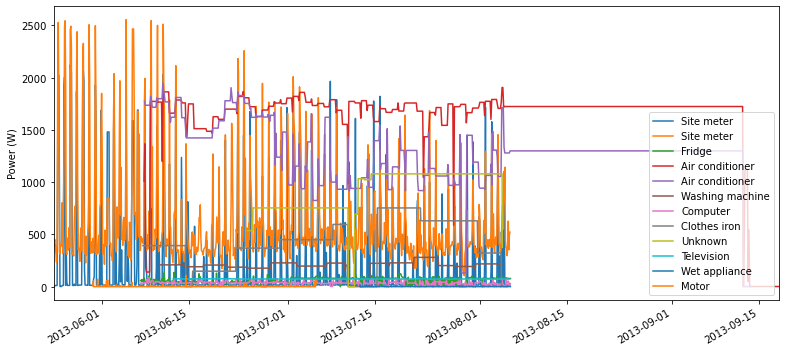

In [605]:
train_elec.plot()

In [671]:
top_5_train_elec = train_elec.submeters().select_top_k(k=2)

10/10 ElecMeter(instance=12, building=1, dataset='iAWE', appliances=[Appliance(type='motor', instance=1)])ce=1)]))

In [672]:
top_5_train_elec

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
)

In [674]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    
    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'apparent', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

In [675]:
classifiers = {'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}
predictions = {}
sample_period = 60
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    start = time.time()
    # Note that we have given the sample period to downsample the data to 1 minute. 
    # If instead of top_5 we wanted to train on all appliance, we would write 
    # fhmm.train(train_elec, sample_period=60)
    clf.train(top_5_train_elec, sample_period=sample_period)
    end = time.time()
    print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

********************
CO
********************
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])'
Done training!
Runtime = 1.7853672504425049 seconds.
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])'
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])'


StopIteration: 

In [647]:
test_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='caxe', site_meter, appliances=[Appliance(type='air conditioner', instance=1)])
)

In [454]:
appliance_labels = [m.label() for m in gt.columns.values]

In [455]:

gt.columns = appliance_labels
predictions['CO'].columns = appliance_labels
predictions['FHMM'].columns = appliance_labels

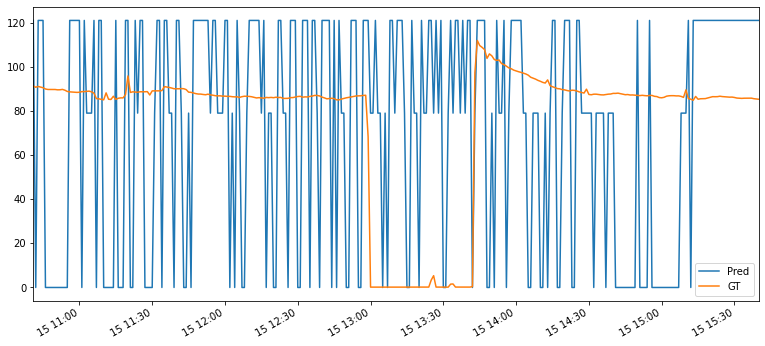

In [456]:
predictions['CO']['Fridge'].head(300).plot(label="Pred")
gt['Fridge'].head(300).plot(label="GT")
plt.legend()

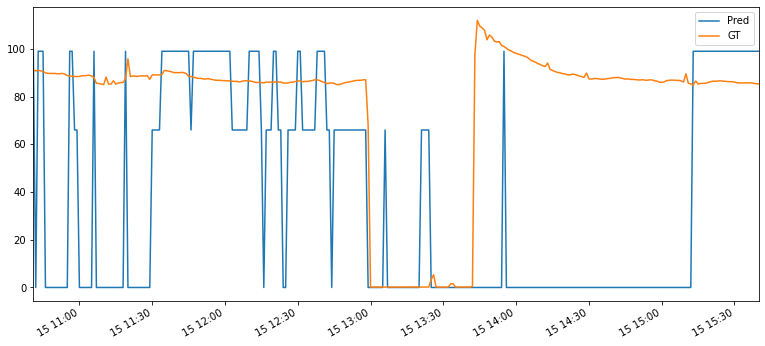

In [457]:
predictions['FHMM']['Fridge'].head(300).plot(label="Pred")
gt['Fridge'].head(300).plot(label="GT")
plt.legend()

IndentationError: expected an indented block (<ipython-input-470-083199b925f2>, line 59)